## Overfitting (and underfitting)

Supervised learning algorithms take a model with undetermined parameters and a set of training data and fits the parameters so that the model predicts the values as well as possible.  A key question is: having trained a model, how likely is it to give good predictions on *new* data, not in the training set?

Let's look at some examples to get a sense of how this might play out.  We'll work
in the context of linear regression.

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy.random import normal,uniform
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Let's start by assuming that our (putatively uknown) function is as simple as can be.  Given a value $x$ between $-1$ and  $1$, our function returns $x+\epsilon$ where $\epsilon$ is a normally distributed error with mean zero and variance $.2$.

In [192]:
def truth(x):
    """compute the true function giving x from y"""
    return x+normal(0,.2,size=x.shape)

Our "training sets" are collections of samples from the $[-1,1]$ interval,
together with the computed $y$ value.  The 

In [193]:
def sample(N=5):
    """choose N x values as a training set from the interval at random and return the data at
    that training set"""
    x = uniform(-1,1,size=(N,1))
    y = truth(x)
    return np.concatenate([x,y],axis=1)

Let's plot some sample training data together with the true line.

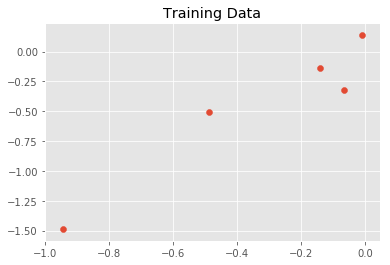

In [201]:
T= sample()
_=plt.scatter(T[:,0],T[:,1])
_=plt.title('Training Data')


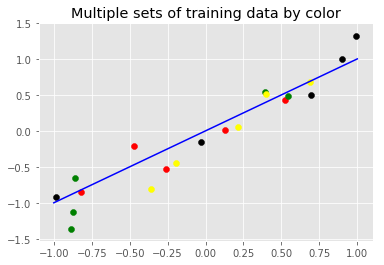

In [200]:
for x in ['red','green','yellow','black']:
    T= sample()
    plt.scatter(T[:,0],T[:,1],c=x)
_=plt.plot(np.linspace(-1,1,20),np.linspace(-1,1,20),color='blue')
_=plt.title("Multiple sets of training data by color")

Let's say that, looking at our training data, we decide to fit
a quadratic polynomial to the data.  This function uses sklearn to do that,
and returns not just the fitted polynomial but also the average squared loss of that fit.

In [223]:
def fit(T,degree=2):
    npts = T.shape[0]
    features = PolynomialFeatures(degree=degree).fit_transform(T[:,0].reshape(-1,1))
    model = LinearRegression().fit(features,T[:,1])
    loss = ((model.predict(features)-T[:,1])**2).sum()
    return model,loss/npts

As the following example shows, the quadratic polynomial gives a good fit -- a *better fit* than you would get from a straight line

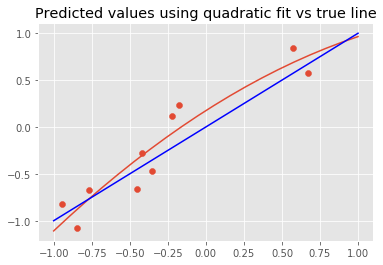

In [228]:
T = sample(10)
model, loss = fit(T,degree=2)
x = np.linspace(-1,1,20).reshape(-1,1)
_=plt.scatter(T[:,0],T[:,1])
_=plt.plot(x,model.predict(PolynomialFeatures(degree=2).fit_transform(x)))
_=plt.title("Predicted values using quadratic fit vs true line")
_=plt.plot(x,x,color='blue')



In fact, the mean squared error of the parabola is smaller than that for the line.

In [229]:
print('MSE for parabola is {} and for line is {}'.format(loss,np.sum(np.square(T[:,0]-T[:,1])/T.shape[1])))

MSE for parabola is 0.040113649102246136 and for line is 0.260647423052599


But what about trying a different training set?

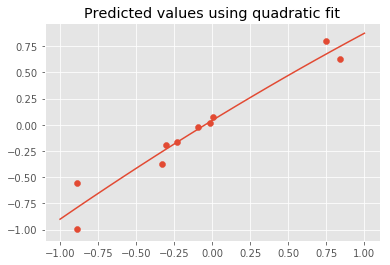

In [230]:
T = sample(10)
model, loss = fit(T,degree=2)
x = np.linspace(-1,1,20).reshape(-1,1)
_=plt.scatter(T[:,0],T[:,1])
_=plt.plot(x,model.predict(PolynomialFeatures(degree=2).fit_transform(x)))
_=plt.title("Predicted values using quadratic fit")

In [231]:
print('MSE for parabola is {} and for line is {}'.format(loss,np.sum(np.square(T[:,0]-T[:,1])/T.shape[1])))

MSE for parabola is 0.014509181126264998 and for line is 0.09971237431177049


As these examples show, the fitted degree 2 model is sensitive to the choice of training set.  We get a better loss value against the training set BUT less generalization.

Here is a more extreme example, where we fit degree 4 polynomials.  

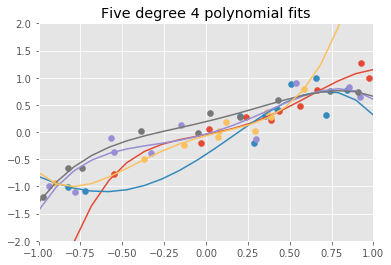

In [222]:
for i in range(5):
    T = sample(10)
    plt.scatter(T[:,0],T[:,1])
    model, loss = fit(T,4)
    predicted = model.predict(PolynomialFeatures(degree=4).fit_transform(np.linspace(-1,1,20).reshape(-1,1)))
    plt.plot(np.linspace(-1,1,20),predicted)
    plt.xlim([-1,1])
    plt.ylim([-2,2])
    _=plt.title("Five degree 4 polynomial fits")

The underlying principle here is that  *A MORE COMPLEX MODELS MAY FIT THE TRAINING DATA AT THE COST OF GENERALIZING MORE POORLY THAN A SIMPLER ONE*.  The phenomenon of
having a model fit "too well" to a training set is called **overfitting**.

The opposite problem, of using a model that is too simple to capture the variability in the outputs, is called **underfitting**.